In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/peopleexample/people-example.csv


In [2]:
path="/kaggle/input/home-data-for-ml-course/train.csv"
df=pd.read_csv(path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df.shape

(1460, 81)

In [11]:

for i in range(100,110):
    print(df['BsmtExposure'][i])

Mn
No
nan
No
No
No
No
No
No
No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
house=df[['Id','LotArea','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','TotalBsmtSF','BsmtFullBath','SalePrice']]

In [9]:
house.head()

,Id,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,TotalBsmtSF,BsmtFullBath,SalePrice
0,1,8450,2003,2003,856,854,856,1,208500
1,2,9600,1976,1976,1262,0,1262,0,181500
2,3,11250,2001,2002,920,866,920,1,223500
3,4,9550,1915,1970,961,756,756,1,140000
4,5,14260,2000,2000,1145,1053,1145,1,250000


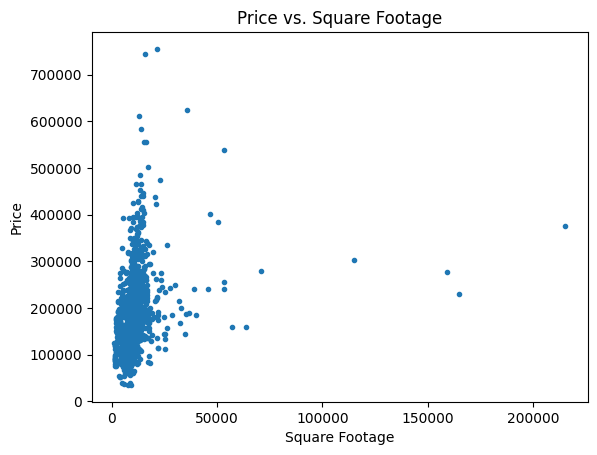

In [18]:
from matplotlib import pyplot as plt
plt.scatter(house['LotArea'], house['SalePrice'], marker='.')
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

In [13]:
x= np.asarray(df[['Id','LotArea','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','TotalBsmtSF','BsmtFullBath']])
y=np.asarray(df['SalePrice'])

In [14]:
from sklearn import preprocessing
# X = preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=10)

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [30]:
model.fit(house[['LotArea']],y )

LinearRegression()

Slope (Coefficient): 2.0999719517076745
Intercept: 158836.1518968766


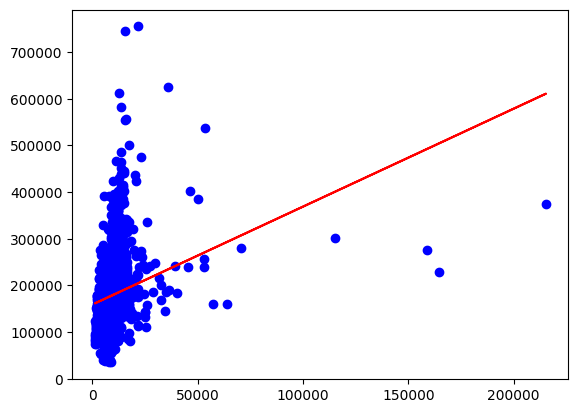

In [31]:
area_pred = model.predict(house[['LotArea']])

# Print coefficients
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

# Visualization
plt.scatter(house[['LotArea']], y, color="blue", label="Original Data")
plt.plot(house[['LotArea']], y_pred, color="red", label="Regression Line")
#plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print Errors
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 5867752122.509075
Mean Absolute Error (MAE): 55121.71057637372
R-squared (R²): 0.0696133153821118


In [32]:
model.fit(house,y )

LinearRegression()

Slope (Coefficient): 1.520396688206259e-15
Intercept: 1.5425030142068863e-09


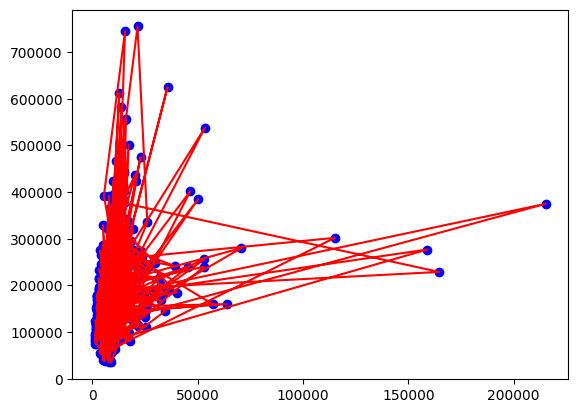

In [33]:
y_pred = model.predict(house)

# Print coefficients
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

# Visualization
plt.scatter(house[['LotArea']], y, color="blue", label="Original Data")
plt.plot(house[['LotArea']], y_pred, color="red", label="Regression Line")
#plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print Errors
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 4.836717672699107e-22
Mean Absolute Error (MAE): 1.4098413760633501e-11
R-squared (R²): 1.0


In [38]:
house1= np.array(house['LotArea'][1])

prediction for house 1

In [42]:
print(area_pred[1])
print(y_pred[1])
print(house['SalePrice'][1])

178995.8826332703
181500.0
181500


In [1]:
python --version


NameError: name 'python' is not defined